In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/dandia14/project-capstone-team-csd-134/ml/dataset/diabetes.csv'
diabetes = pd.read_csv(url)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
glucose = (diabetes.Glucose == 0).sum()
bloodPressure = (diabetes.BloodPressure == 0).sum()
skinThickness = (diabetes.SkinThickness == 0).sum()
insulin = (diabetes.Insulin == 0).sum()
bmi = (diabetes.BMI == 0).sum()
diabetesPedigreeFunction = (diabetes.DiabetesPedigreeFunction == 0).sum()
age = (diabetes.Age == 0).sum()

print("Nilai 0 di kolom Glucose ada: ", glucose)
print("Nilai 0 di kolom BloodPressure ada: ", bloodPressure)
print("Nilai 0 di kolom SkinThickness ada: ", skinThickness)
print("Nilai 0 di kolom Insulin ada: ", insulin)
print("Nilai 0 di kolom BMI ada: ", bmi)
print("Nilai 0 di kolom DiabetesPedigreeFunction ada: ", diabetesPedigreeFunction)
print("Nilai 0 di kolom Age ada: ", age)

Nilai 0 di kolom Glucose ada:  5
Nilai 0 di kolom BloodPressure ada:  35
Nilai 0 di kolom SkinThickness ada:  227
Nilai 0 di kolom Insulin ada:  374
Nilai 0 di kolom BMI ada:  11
Nilai 0 di kolom DiabetesPedigreeFunction ada:  0
Nilai 0 di kolom Age ada:  0


In [7]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    diabetes[col].replace(0,np.NaN,inplace=True)

In [8]:
# We can fill in NaN values with a mean according to the target
for col in diabetes.columns:
    diabetes.loc[(diabetes["Outcome"]==0) & (diabetes[col].isnull()),col] = diabetes[diabetes["Outcome"]==0][col].mean()
    diabetes.loc[(diabetes["Outcome"]==1) & (diabetes[col].isnull()),col] = diabetes[diabetes["Outcome"]==1][col].mean()

In [9]:
glucose = (diabetes.Glucose == 0).sum()
bloodPressure = (diabetes.BloodPressure == 0).sum()
skinThickness = (diabetes.SkinThickness == 0).sum()
insulin = (diabetes.Insulin == 0).sum()
bmi = (diabetes.BMI == 0).sum()

print("Nilai 0 di kolom Glucose ada: ", glucose)
print("Nilai 0 di kolom BloodPressure ada: ", bloodPressure)
print("Nilai 0 di kolom SkinThickness ada: ", skinThickness)
print("Nilai 0 di kolom Insulin ada: ", insulin)
print("Nilai 0 di kolom BMI ada: ", bmi)

Nilai 0 di kolom Glucose ada:  0
Nilai 0 di kolom BloodPressure ada:  0
Nilai 0 di kolom SkinThickness ada:  0
Nilai 0 di kolom Insulin ada:  0
Nilai 0 di kolom BMI ada:  0


In [10]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [11]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

In [12]:
columns = X.columns
indexs = X.index
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,130.287879,26.6,0.351,31.0
2,8.0,183.0,64.0,33.0,206.846154,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns, index=indexs)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864020,-0.035389,0.645088,0.561272,0.167806,0.468492,1.425995
1,-0.844885,-1.205478,-0.531332,-0.027701,-0.300842,-0.850452,-0.365061,-0.190672
2,1.233880,2.013741,-0.696647,0.420825,0.561272,-1.330487,0.604397,-0.105584
3,-0.844885,-1.074081,-0.531332,-0.700491,-0.709475,-0.632253,-0.920763,-1.041549
4,-1.141852,0.502679,-2.680419,0.645088,0.123830,1.549727,5.484909,-0.020496


In [15]:
X.describe().round(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
std,1.000652,1.000652,1.000652,1.000652,1.000652,1.000652,1.000652,1.000652
min,-1.141852,-2.552294,-4.002935,-2.494595,-1.610345,-2.072360,-1.189553,-1.041549
25%,-0.844885,-0.720952,-0.696647,-0.476227,-0.399801,-0.719533,-0.688969,-0.786286
50%,-0.250952,-0.154304,-0.035389,-0.139833,-0.300842,-0.057665,-0.300128,-0.360847
75%,0.639947,0.634076,0.625869,0.420825,0.561272,0.604202,0.466227,0.660206
max,3.906578,2.539328,4.097471,7.821507,7.758703,5.040895,5.883565,4.063716


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
# membuat model Decision Tree
decisiontree = DecisionTreeClassifier() 
# melakukan pelatihan model terhadap data
decisiontree.fit(X_train, y_train)
y_pred_decisiontree = decisiontree.predict(X_train)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(X_train, y_train)
y_pred_kmeans = kmeans.predict(X_train)

In [21]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_train)

In [24]:
from sklearn.metrics import mean_squared_error

mse = pd.DataFrame(columns=['train', 'test'], index=['K-means','DecisionTree','SVM'])
model_dict = {'K-means': kmeans, 'DecisionTree': decisiontree, 'SVM': svm}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
K-means,0.0165228,0.0174545
DecisionTree,0,0.000162338
SVM,0.000114007,0.000155844


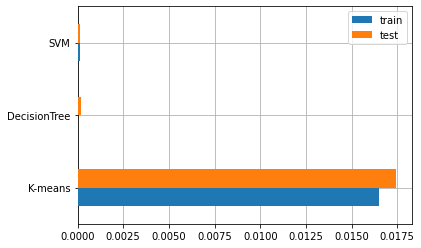

In [25]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [30]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_K-means,prediksi_DecisionTree,prediksi_SVM
668,0,7,1,1
